<p align="center">
<FONT FACE="times new roman" SIZE=5>
<i><b >Parcial Segundo Corte</i>

<i><b>Docente:</b> Ricardo Fonseca</i>
<br>
<i><b>Asignatura:</b> Aprendizaje de Máquina</i>
<br>
<i><b>Estudiante:</b> Laura García, Andrea Terraza, Isabella Martinez</i>
<br>
<i>30/04/2024</i>
<br>
</FONT>
</p>

In [ ]:
!pip install gdown

In [ ]:
import sys
import matplotlib.pyplot as plt
from packaging import version
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from pathlib import Path
import urllib.request
import pandas as pd
import numpy as np
import requests
import tarfile
import sklearn
import gdown
import os
assert sys.version_info >= (3 ,7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# 2. Cargue y exploración del dataset

a) Cree un script para cargar el archivo cifar10_data.npz.
-----

In [ ]:
def load_data(gdrive_id, output_path, output_file):
    # Construye la URL de Google Drive y la ruta de salida completa
    url = f'https://drive.google.com/uc?id={gdrive_id}'
    output = os.path.join(output_path, output_file)

    # Crear la carpeta si no existe
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        print(f"Carpeta creada: {output_path}")

    gdown.download(url, output, quiet=False)

    training_data = None
    test_data = None
    training_labels = None

    # Intenta cargar el archivo .npz y asignar los datos a variables
    try:
        with np.load(output, allow_pickle=True) as data:
            training_data = data['training_data']
            training_labels = data['training_labels']
            test_data = data['test_data']
            print("Datos cargados correctamente:")
            return training_data, training_labels, test_data
    except Exception as e:
        print(f"Error al carga el archivo npz: {e}")
        return None, None, None

In [ ]:
gdrive_id = '1GO2H4N2Q_SXRWznGEeEvwkCF74vtJjGz'
output_path = '/content/datasets'
output_file = 'cifar10-data.npz'
data = load_data(gdrive_id, output_path, output_file)

Carpeta creada: /content/datasets


Downloading...
From (original): https://drive.google.com/uc?id=1GO2H4N2Q_SXRWznGEeEvwkCF74vtJjGz
From (redirected): https://drive.google.com/uc?id=1GO2H4N2Q_SXRWznGEeEvwkCF74vtJjGz&confirm=t&uuid=3745e1f8-7b80-43ed-8c26-64aa9078ca30
To: /content/datasets/cifar10-data.npz
100%|██████████| 185M/185M [00:01<00:00, 95.0MB/s]


Datos cargados correctamente:


In [ ]:
if data:
    training_data, training_labels, test_data = data
else:
    print("Error al cargar los datos")

In [ ]:
print(data)

(array([[169, 174, 175, ...,   1,   1,   0],
       [179, 185, 186, ..., 202, 198, 197],
       [ 62,  62,  63, ..., 113, 114, 115],
       ...,
       [175, 174, 175, ..., 191, 190, 190],
       [214, 212, 220, ...,  60,  69,  79],
       [128, 122, 125, ..., 127, 127, 128]], dtype=uint8), array([3, 8, 9, ..., 2, 9, 5]), array([[ 93,  95,  95, ..., 157, 158, 155],
       [211, 208, 198, ..., 250, 244, 223],
       [ 87,  89,  90, ..., 185, 183, 189],
       ...,
       [123, 122, 122, ..., 167, 162, 157],
       [150, 151, 151, ...,  69,  40,  55],
       [195, 196, 206, ...,  83,  83,  80]], dtype=uint8))


In [ ]:
training_data

array([[169, 174, 175, ...,   1,   1,   0],
       [179, 185, 186, ..., 202, 198, 197],
       [ 62,  62,  63, ..., 113, 114, 115],
       ...,
       [175, 174, 175, ..., 191, 190, 190],
       [214, 212, 220, ...,  60,  69,  79],
       [128, 122, 125, ..., 127, 127, 128]], dtype=uint8)

In [ ]:
test_data

array([[ 93,  95,  95, ..., 157, 158, 155],
       [211, 208, 198, ..., 250, 244, 223],
       [ 87,  89,  90, ..., 185, 183, 189],
       ...,
       [123, 122, 122, ..., 167, 162, 157],
       [150, 151, 151, ...,  69,  40,  55],
       [195, 196, 206, ...,  83,  83,  80]], dtype=uint8)

Los array impresos representan los datos de entrenamiento y prueba, específicamente, los valores de píxeles de imágenes que son parte del conjunto de datos CIFAR-10, dado que el patrón y el rango de valores (0-255) coinciden con lo que esperaríamos de imágenes en formato de color RGB almacenadas en una matriz numérica.

Cada fila del array representa una imagen aplanada, con el valor de cada elemento del array correspondiente a la intensidad de un píxel en la imagen. Los valores están entre 0 y 255, lo cual es típico para imágenes codificadas en 8 bits por canal.

b) Explore los puntos de muestra y explique sus características. Revise si es necesario preprocesar. Debe justificar la elección de los procesos realizados
----


**Descripción de los datos**

In [ ]:
def describe_data(data, name="Array"):
    print(f"Estadísticas descriptivas para {name}:")
    print(f"Tipo de datos: {data.dtype}")
    print(f"Tamaño del arreglo: {data.shape}")
    print(f"Valor mínimo: {data.min()}")
    print(f"Valor máximo: {data.max()}")
    print(f"Media: {data.mean():.4f}")
    print(f"Mediana: {np.median(data):.4f}")
    print(f"Desviación estándar: {data.std():.4f}")
    print(f"Varianza: {data.var():.4f}\n")

In [ ]:
describe_data(training_data, "Training Data")

Estadísticas descriptivas para Training Data:
Tipo de datos: uint8
Tamaño del arreglo: (50000, 3072)
Valor mínimo: 0
Valor máximo: 255
Media: 120.8290
Mediana: 117.0000
Desviación estándar: 64.1193
Varianza: 4111.2860



El conjunto de datos consiste en 50,000 muestras, donde cada muestra está representada por un vector de características de longitud 3,072. Estas características están codificadas como enteros sin signo de 8 bits (uint8), lo que indica que los valores varían entre 0 y 255, lo que significa que las características están representadas como valores de intensidad de píxeles en imágenes RGB. La media del conjunto de datos es de aproximadamente 120.83, con una mediana de 117. La desviación estándar de aproximadamente 64.12 indica una dispersión considerable en los valores de las características. Esto implica que las características pueden tener una amplia variabilidad y pueden no estar normalizadas. La varianza de 4,111.29 proporciona una medida de la dispersión de los datos alrededor de la media

Cada imagen proviene de un formato original que es 32x32 píxeles RGB (dado que 32 * 32 * 3 = 3072)

In [ ]:
describe_data(training_labels, "Training Labels")

Estadísticas descriptivas para Training Labels:
Tipo de datos: int64
Tamaño del arreglo: (50000,)
Valor mínimo: 0
Valor máximo: 9
Media: 4.4990
Mediana: 5.0000
Desviación estándar: 2.8751
Varianza: 8.2660



 Las etiquetas de entrenamiento son representadas como enteros de 64 bits (int64) y constan de un total de 50,000 muestras. La presencia de valores enteros entre 0 y 9 como el mínimo y el máximo sugiere que las etiquetas están codificadas como números enteros que representan clases o categorías específicas. Con una media de aproximadamente 4.5 y una mediana de 5.0, observamos una distribución aparentemente uniforme de las etiquetas, indicando que las clases están relativamente bien balanceadas. La varianza de 8.2660 proporciona una medida adicional de la dispersión de las etiquetas alrededor de la media.

In [ ]:
unique_labels, label_counts = np.unique(training_labels, return_counts=True)
print("Etiquetas únicas:", unique_labels)
print("Frecuencia de cada etiqueta:", label_counts)

Etiquetas únicas: [0 1 2 3 4 5 6 7 8 9]
Frecuencia de cada etiqueta: [5045 4984 4985 4988 4993 4998 5006 4990 4996 5015]


Tenemos 10 clases en nuestro training_labels, que van desde 0 a 9 y se ve balanceado la cantidad de etiquetas de cada clase

In [ ]:
describe_data(test_data, "Test Data")

Estadísticas descriptivas para Test Data:
Tipo de datos: uint8
Tamaño del arreglo: (10000, 3072)
Valor mínimo: 0
Valor máximo: 255
Media: 120.9218
Mediana: 117.0000
Desviación estándar: 64.2191
Varianza: 4124.0946



El tipo de datos uint8 (entero sin signo de 8 bits) es común en imágenes porque cada byte  representar un valor de pixel de una imagen que varía de 0 a 255

In [ ]:
first_image = training_data[0]

# Conocemos el tamaño de la imagen (32x32)
height = 32
width = 32

# Calcular el número de canales
num_channels = first_image.size // (height * width)

print(f"El número de canales de la imagen es: {num_channels}")

El número de canales de la imagen es: 3


In [ ]:
training_data_original = training_data
test_data_original = test_data
training_labels_original = training_labels

Dado que las dimensiones de training_data viene en (50000,3072), siendo imágenes en RGB, toda la imagen en un solo canal pero las dimensiones originales son 32x32x3 , representando (altura,ancho,canales) se procede a hacer la transfomación de dimensionalidad para que cada imagen quede con 3 canales

In [ ]:
def transform_images(images):
    transformed_images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    return transformed_images

# Transforma los datos de entrenamiento y prueba
training_data = transform_images(training_data)
test_data = transform_images(test_data)

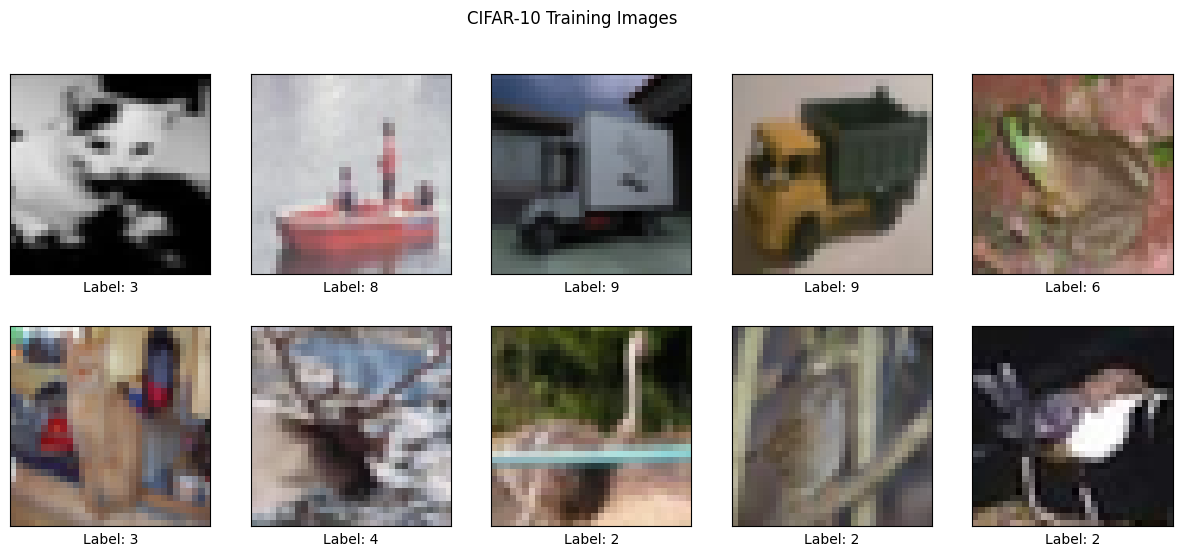

In [ ]:
def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6))
    fig.suptitle('CIFAR-10 Training Images')
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i].reshape(32, 32, 3), cmap='binary')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel(f"Label: {labels[i]}")
    plt.show()

plot_images(training_data, training_labels, 2, 5)

Las etiquetas de training_labels representan las siguientes clases :

0 -> Avión

1 -> Carro

2 -> Ave

3 -> Gato

4 -> Siervo

5 -> Perro

6 -> Rana

7 -> Caballo

8 -> Barco

9 -> Camión

Con las estadísticas y visualizaciones generadas, podemos decir que los datos están en buena forma para ser usados en modelos de machine learning. La normalización de los datos sera el siguiente paso más importante antes de proceder con el entrenamiento del modelo.

 **Preprocesamiento de Datos**


Normalización de los datos

Al normalizar los valores de los píxeles de imágenes a un rango entre 0 y 1 (al dividir por 255, dado que los píxeles varían entre 0 y 255), se ayuda a que el algoritmo de optimización del modelo (como el descenso del gradiente) converja más rápidamente. Esto se debe a que los valores de entrada más pequeños y en un rango uniforme pueden reducir el tiempo que se necesita para encontrar los mínimos de la función de pérdida.

In [ ]:
training_data = training_data.astype('float32') / 255.0
test_data = test_data.astype('float32')/255.0

In [ ]:
training_data

array([[[[0.6627451 , 0.6627451 , 0.6627451 ],
         [0.68235296, 0.68235296, 0.68235296],
         [0.6862745 , 0.6862745 , 0.6862745 ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.01176471, 0.01176471, 0.01176471],
         [0.00784314, 0.00784314, 0.00784314]],

        [[0.7176471 , 0.7176471 , 0.7176471 ],
         [0.72156864, 0.72156864, 0.72156864],
         [0.7137255 , 0.7137255 , 0.7137255 ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.09411765, 0.09411765, 0.09411765],
         [0.11372549, 0.11372549, 0.11372549]],

        [[0.7490196 , 0.7490196 , 0.7490196 ],
         [0.74509805, 0.74509805, 0.74509805],
         [0.73333335, 0.73333335, 0.73333335],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.2       , 0.2       , 0.2       ],
         [0.3137255 , 0.3137255 , 0.3137255 ]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ]

In [ ]:
test_data

array([[[[0.3647059 , 0.38431373, 0.43137255],
         [0.37254903, 0.39607844, 0.44313726],
         [0.37254903, 0.40784314, 0.4509804 ],
         ...,
         [0.08235294, 0.12156863, 0.14509805],
         [0.08235294, 0.12156863, 0.14509805],
         [0.07450981, 0.11764706, 0.13725491]],

        [[0.26666668, 0.3019608 , 0.35686275],
         [0.24705882, 0.28627452, 0.34117648],
         [0.2509804 , 0.3019608 , 0.3529412 ],
         ...,
         [0.07843138, 0.11764706, 0.13333334],
         [0.07450981, 0.10980392, 0.12941177],
         [0.07450981, 0.10980392, 0.1254902 ]],

        [[0.21176471, 0.25882354, 0.32156864],
         [0.2       , 0.2509804 , 0.3137255 ],
         [0.20784314, 0.27058825, 0.3254902 ],
         ...,
         [0.10196079, 0.13725491, 0.14509805],
         [0.09411765, 0.12941177, 0.13725491],
         [0.09411765, 0.12941177, 0.14117648]],

        ...,

        [[0.5686275 , 0.60784316, 0.6313726 ],
         [0.58431375, 0.62352943, 0.64705884]

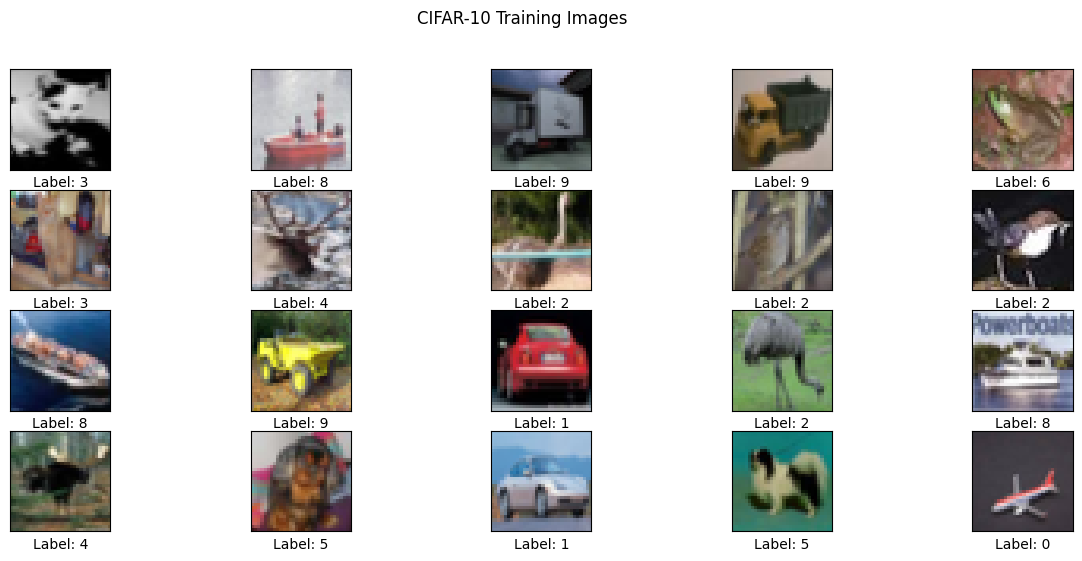

In [ ]:
plot_images(training_data, training_labels, 4, 5)

Aquí podemos ver más ejemplos del training que se está utilizando

#3. Partición de los datos

a) Escriba un código que reserve 5000 imágenes de entrenamiento como conjunto de validación.

b) Mezcle las etiquetas con las imágenes de entrenamiento. Es un error muy común etiquetar
erróneamente las imágenes de entrenamiento olvidando permutar las etiquetas con las imágenes.

In [ ]:
import numpy as np

def shuffle_and_partition(data, labels, train_fraction=0.8):

    # Verifica que los datos y las etiquetas tengan la misma longitud
    assert len(data) == len(labels)

    np.random.seed(42)

    # Genera índices aleatorios para barajar los datos y las etiquetas de la misma manera
    indices = np.arange(len(data))
    np.random.shuffle(indices)

    #Se muestran los indices barajados
    print(indices)

    # Baraja los datos y las etiquetas
    shuffled_data = data[indices]
    shuffled_labels = labels[indices]

    # Calcula el índice de corte para la partición de entrenamiento y validación
    train_size = int(len(data) * train_fraction)

    # Particiona los datos y las etiquetas en conjuntos de entrenamiento y validación
    train_data = shuffled_data[:train_size]
    train_labels = shuffled_labels[:train_size]
    validation_data = shuffled_data[train_size:]
    validation_labels = shuffled_labels[train_size:]

    return train_data, train_labels, validation_data, validation_labels

#5000 imágenes para el conjunto de validación corresponden a  10% de training_data
train_data, train_labels, validation_data, validation_labels = shuffle_and_partition(training_data, training_labels, train_fraction=0.9)

[33553  9427   199 ... 38158   860 15795]
[33553  9427   199 ... 38158   860 15795]


In [ ]:
validation_data.shape

(5000, 32, 32, 3)

In [ ]:
validation_labels.shape

(5000,)

#4. Implementación del Algoritmo de entrenamiento

In [ ]:
print(train_data.shape)
train_data

(45000, 32, 32, 3)


array([[[[0.81960785, 0.79607844, 0.8117647 ],
         [0.79607844, 0.7764706 , 0.8       ],
         [0.78039217, 0.76862746, 0.79607844],
         ...,
         [0.49411765, 0.38431373, 0.36862746],
         [0.42352942, 0.3019608 , 0.28235295],
         [0.56078434, 0.44705883, 0.42352942]],

        [[0.8235294 , 0.7647059 , 0.76862746],
         [0.8235294 , 0.7882353 , 0.79607844],
         [0.8039216 , 0.7882353 , 0.8       ],
         ...,
         [0.37254903, 0.2509804 , 0.23921569],
         [0.40392157, 0.26666668, 0.2509804 ],
         [0.5568628 , 0.4392157 , 0.41568628]],

        [[0.78039217, 0.7058824 , 0.7019608 ],
         [0.8       , 0.7529412 , 0.7490196 ],
         [0.80784315, 0.7882353 , 0.78431374],
         ...,
         [0.3019608 , 0.18039216, 0.16862746],
         [0.4117647 , 0.27450982, 0.2627451 ],
         [0.57254905, 0.4627451 , 0.4392157 ]],

        ...,

        [[0.7647059 , 0.8156863 , 0.827451  ],
         [0.70980394, 0.7490196 , 0.76862746]

a) Utilice píxeles sin procesar como características. En esta etapa, debería esperar precisiones entre el 25% y el 35%. Entrene su modelo con los siguientes números de ejemplos de entrenamiento: 100, 200, 500, 1000, 2000, 5000.
----

In [ ]:
def train_linear_svm(train_data, train_labels, validation_data, validation_labels, num_examples):
    svm_classifier = SVC(kernel='linear')

    subset_train_data = train_data[:num_examples]
    subset_train_labels = train_labels[:num_examples]

    svm_classifier.fit(subset_train_data.reshape(len(subset_train_data), -1), subset_train_labels)

    train_predictions = svm_classifier.predict(train_data.reshape(len(train_data), -1))
    validation_predictions = svm_classifier.predict(validation_data.reshape(len(validation_data), -1))

    train_accuracy = accuracy_score(train_labels, train_predictions)
    validation_accuracy = accuracy_score(validation_labels, validation_predictions)

    return train_accuracy, validation_accuracy

# Definir los números de ejemplos de entrenamiento a utilizar
num_training_examples = [100, 200, 500, 1000, 2000, 5000]

# Almacenar las precisiones en listas separadas para el conjunto de entrenamiento y validación
train_accuracies = []
validation_accuracies = []

# Iterar sobre los números de ejemplos de entrenamiento y entrenar el clasificador SVM lineal
for num_examples in num_training_examples:
    train_accuracy, validation_accuracy = train_linear_svm(train_data, train_labels, validation_data, validation_labels, num_examples)
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)
    print(f"Entrenado con {num_examples} ejemplos, Precisión de entrenamiento: {train_accuracy*100:.2f}%, Precisión de validación: {validation_accuracy*100:.2f}%")

Entrenado con 100 ejemplos, Precisión de entrenamiento: 25.16%, Precisión de validación: 24.44%
Entrenado con 200 ejemplos, Precisión de entrenamiento: 26.89%, Precisión de validación: 25.96%
Entrenado con 500 ejemplos, Precisión de entrenamiento: 29.34%, Precisión de validación: 28.30%
Entrenado con 1000 ejemplos, Precisión de entrenamiento: 30.86%, Precisión de validación: 29.02%
Entrenado con 2000 ejemplos, Precisión de entrenamiento: 33.04%, Precisión de validación: 31.04%
Entrenado con 5000 ejemplos, Precisión de entrenamiento: 38.56%, Precisión de validación: 31.20%


De estos resultados podemos concluir lo siguiente:

Podemos observar que tanto la precisión de entrenamiento como la de validación aumentan a medida que se incrementa el número de ejemplos de entrenamiento. Esto es un indicador de que tener más datos ayuda al modelo a aprender mejor y generalizar más efectivamente.

Podemos ver que la precisión de validación siempre es ligeramente más baja que la de entrenamiento, lo cual es positivo y sugiere que el modelo no está sufriendo de sobreajuste significativo.

Las precisiones obtenidas son relativamente bajas, lo cual es normal para este conjunto de datos ya que se usan características simples como los píxeles brutos. La precisión máxima obtenida en la validación es del 31.20% con 5000 ejemplos, lo que está correcto en base a las expectativas iniciales para el clasificador SVM lineal utilizando píxeles brutos como características.




b) Incluya un gráfico que muestre la cantidad de ejemplos frente a la precisión de entrenamiento y validación para el conjunto de datos.
---

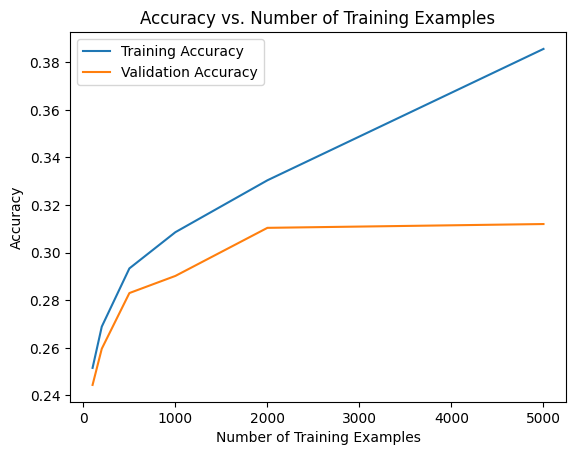

In [ ]:
# Graficar la precisión en función del número de ejemplos de entrenamiento
plt.plot(num_training_examples, train_accuracies, label='Training Accuracy')
plt.plot(num_training_examples, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Training Examples')
plt.legend()
plt.show()

#Conclusiones

El proyecto consistió en cargar, procesar y analizar el conjunto de datos CIFAR-10 para entrenar un modelo SVM lineal destinado a clasificar imágenes basadas en sus píxeles brutos. Se llevó a cabo un meticuloso preprocesamiento de los datos, que incluyó la normalización y reestructuración necesarias para adaptar las imágenes a las especificaciones del modelo SVM. La evaluación estadística confirmó que las imágenes estaban equilibradamente distribuidas entre diez clases, facilitando un entrenamiento eficaz del modelo.

La creación de una función para barajar y dividir los datos en conjuntos de entrenamiento y validación fue crucial para asegurar una evaluación justa del modelo, permitiendo medir adecuadamente la capacidad de generalización del modelo. La implementación del SVM y los experimentos con distintos tamaños de conjuntos de entrenamiento revelaron que, aunque la precisión mejora al aumentar la cantidad de datos, esta tiende a estabilizarse, lo que sugiere un límite en la capacidad de aprendizaje del modelo con las características actuales. Los gráficos generados proporcionaron una representación visual efectiva de cómo la precisión varía con el número de ejemplos de entrenamiento, ilustrando un punto de rendimientos decrecientes para el aumento de datos.


##Modelo de clasificación SVM:##


### Interpretación y Posibles Acciones:

1. **Baja Precisión de Validación**: La precisión de validación, incluso en su punto más alto, está por debajo del 40%. Esto es indicativo de un modelo que podría no ser adecuado para la tarea de clasificación, posiblemente debido a la complejidad insuficiente para capturar la naturaleza de los datos o debido a características no lineales en los datos que un kernel lineal no puede manejar.

2. **Mejora de Modelo**: Considerar el uso de un kernel diferente (como RBF, polinomial, etc.) que pueda capturar relaciones no lineales entre las características.


3. **Alternativas de Modelos**: Si los ajustes no resultan en mejoras significativas, puede ser necesario explorar modelos de clasificación alternativos como redes neuronales, árboles de decisión o métodos de ensamble que puedan manejar mejor la complejidad de los datos.


A pesar de la capacidad del SVM lineal de aprender con más datos, la gráfica indica que el modelo no está realizando una buena generalización en el conjunto de validación. Esto es crucial, ya que la habilidad para predecir correctamente en datos no vistos es el objetivo principal de un modelo de clasificación. Se necesitan pasos adicionales para mejorar el modelo, incluyendo la exploración de diferentes kernels, ajustes de hiperparámetros, y posiblemente la evaluación de otros algoritmos de clasificación más robustos a la complejidad y a la naturaleza potencialmente no lineal de los datos.